In [5]:
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sbn
import numpy as num

In [6]:
import warnings
warnings.filterwarnings('ignore')

***Merging dataset***

In [7]:
df1 = pd.read_csv('Eye-Tracking Dataset/Eye-tracking Output/1.csv')

In [8]:
import pandas as pd

# Load the dataset into a pandas dataframe
df = pd.read_csv('Eye-Tracking Dataset/Metadata_Participants.csv')

# Rename the column 'old_column_name' to 'new_column_name'
df.rename(columns={'ParticipantID': 'Participant'}, inplace=True)

# Save the updated dataframe to a new CSV file
df.to_csv('Metadata_Participants.csv', index=False)

In [9]:
import pandas as pd

# Load the two datase
df1 = pd.read_csv('Eye-Tracking Dataset/Eye-tracking Output/1.csv')
df2 = pd.read_csv('Metadata_Participants.csv')

# Merge the datasets based on the common column "participant"
merged_df = pd.merge(df2[['Participant', 'Gender', 'Age', 'Class', 'CARS Score']], 
                     df1[['Participant', 'Tracking Ratio [%]', 'Color', 'Category Group', 'Category Right', 'Category Left']],
                     on='Participant')



In [10]:
merged_df

,Participant,Gender,Age,Class,CARS Score,Tracking Ratio [%],Color,Category Group,Category Right,Category Left
0,18,M,11.7,ASD,34.5,18.7598,Khaki,Information,Separator,Separator
1,18,M,11.7,ASD,34.5,18.7598,Khaki,Eye,Blink,Blink
2,18,M,11.7,ASD,34.5,18.7598,Khaki,Eye,Blink,Blink
3,18,M,11.7,ASD,34.5,18.7598,Khaki,Eye,Blink,Blink
4,18,M,11.7,ASD,34.5,18.7598,Khaki,Eye,Blink,Blink
...,...,...,...,...,...,...,...,...,...,...
1857,28,M,11.8,ASD,36.5,23.1018,GreenYellow,Eye,Blink,Blink
1858,28,M,11.8,ASD,36.5,23.1018,GreenYellow,Eye,Blink,Blink
1859,28,M,11.8,ASD,36.5,23.1018,GreenYellow,Eye,Blink,Blink
1860,28,M,11.8,ASD,36.5,23.1018,GreenYellow,Eye,Blink,Blink


***Data Preprocessing***

In [11]:
merged_df.isna().sum()

Participant           0
Gender                0
Age                   0
Class                 0
CARS Score            0
Tracking Ratio [%]    0
Color                 0
Category Group        0
Category Right        0
Category Left         0
dtype: int64

In [12]:
merged_df.shape

(1862, 10)

In [13]:
merged_df.describe()

,Age,CARS Score,Tracking Ratio [%]
count,1862.000000,1862.000000,1862.000000
mean,11.714393,34.787863,19.384750
std,0.035111,0.702229,1.524538
min,11.700000,34.500000,18.759800
25%,11.700000,34.500000,18.759800
50%,11.700000,34.500000,18.759800
75%,11.700000,34.500000,18.759800
max,11.800000,36.500000,23.101800


***EDA Analysis***

<AxesSubplot:xlabel='Gender', ylabel='count'>

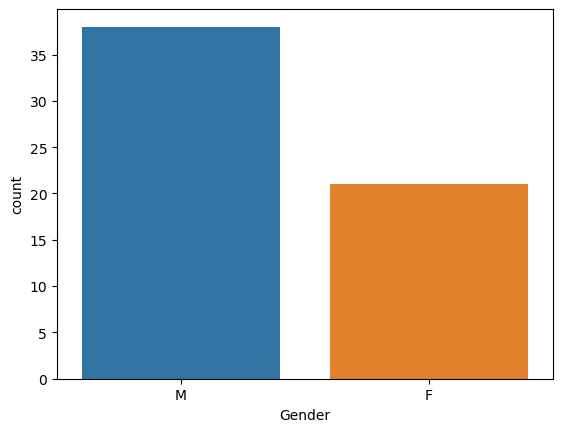

In [14]:
sbn.countplot(df['Gender'])

<AxesSubplot:xlabel='Class', ylabel='count'>

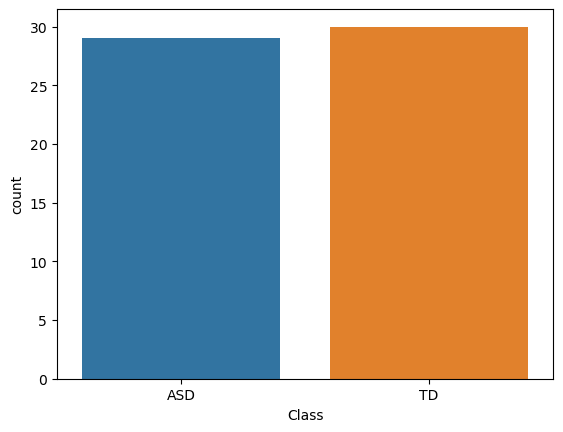

In [15]:
sbn.countplot(df['Class'])

<AxesSubplot:xlabel='Category Right', ylabel='count'>

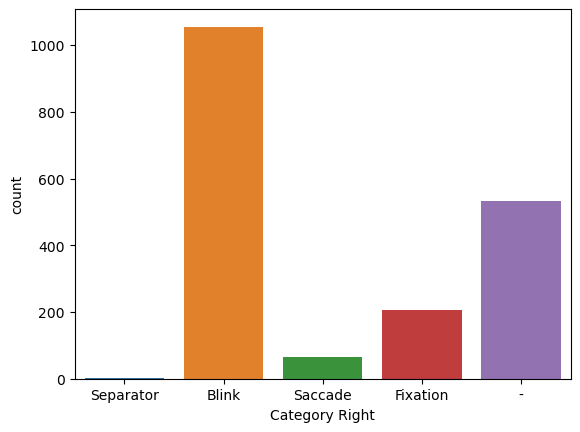

In [16]:
sbn.countplot(merged_df['Category Right'])

<AxesSubplot:xlabel='Gender', ylabel='Tracking Ratio [%]'>

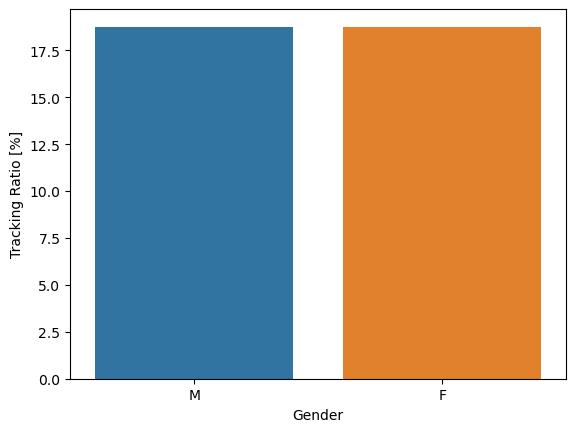

In [17]:
sbn.barplot(df['Gender'],merged_df['Tracking Ratio [%]'])

<AxesSubplot:xlabel='Color', ylabel='Tracking Ratio [%]'>

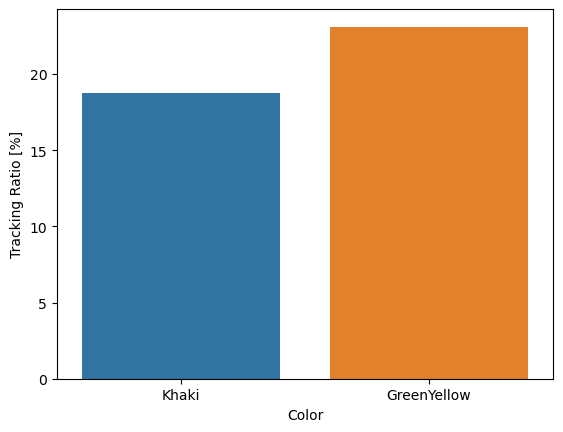

In [18]:
sbn.barplot(merged_df['Color'], merged_df['Tracking Ratio [%]'])

***Another Data preprocessing***

In [19]:
from sklearn import preprocessing ## importing preprocessing

In [20]:
label_encoder = preprocessing.LabelEncoder() ## using label encoder

In [21]:
merged_df['Color']= label_encoder.fit_transform(merged_df['Color']) ## transforming into numerical variable
merged_df['Class']= label_encoder.fit_transform(merged_df['Class']) ## transforming into numerical variable
merged_df['Category Group']= label_encoder.fit_transform(merged_df['Category Group']) ## transforming into numerical variable
merged_df['Category Right']= label_encoder.fit_transform(merged_df['Category Right']) ## transforming into numerical variable
merged_df['Category Left']= label_encoder.fit_transform(merged_df['Category Left']) ## transforming into numerical variable

In [22]:
cols_to_drop=['Class']
merged_df=merged_df.drop(cols_to_drop,axis=1) ## dropiing column

In [23]:
merged_df

,Participant,Gender,Age,CARS Score,Tracking Ratio [%],Color,Category Group,Category Right,Category Left
0,18,M,11.7,34.5,18.7598,1,1,4,4
1,18,M,11.7,34.5,18.7598,1,0,1,1
2,18,M,11.7,34.5,18.7598,1,0,1,1
3,18,M,11.7,34.5,18.7598,1,0,1,1
4,18,M,11.7,34.5,18.7598,1,0,1,1
...,...,...,...,...,...,...,...,...,...
1857,28,M,11.8,36.5,23.1018,0,0,1,1
1858,28,M,11.8,36.5,23.1018,0,0,1,1
1859,28,M,11.8,36.5,23.1018,0,0,1,1
1860,28,M,11.8,36.5,23.1018,0,0,1,1


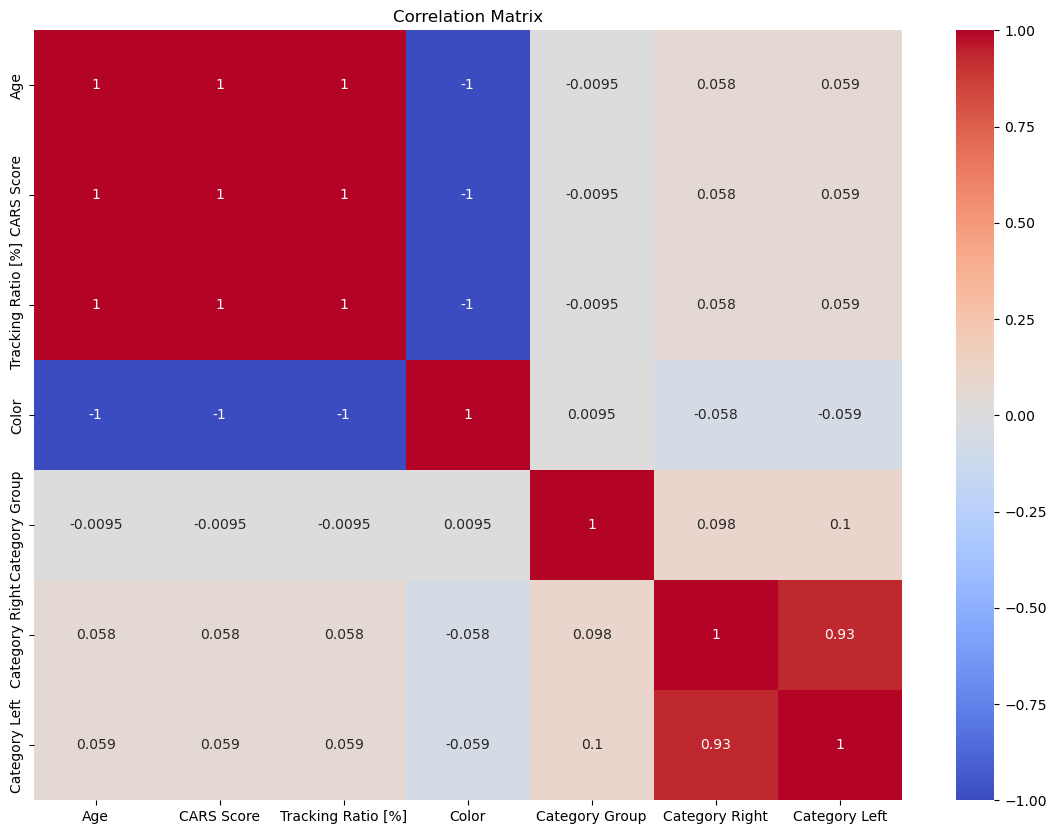

In [24]:
# Computing correlation matrix
corr = merged_df.corr()

# Creating heatmap with correlation values
fig, ax = plot.subplots(figsize=(14,10))
sbn.heatmap(corr, cmap='coolwarm', annot=True, ax=ax) 

# Setting title
ax.set_title("Correlation Matrix")

# Displaying plot
plot.show()

***Train test splitting***

In [25]:
X = merged_df[['Age', 'CARS Score', 'Tracking Ratio [%]', 'Color', 'Category Group', 'Category Left']]
Y = merged_df['Category Right'] ## Spearating independent and dependent variables

In [26]:
X

,Age,CARS Score,Tracking Ratio [%],Color,Category Group,Category Left
0,11.7,34.5,18.7598,1,1,4
1,11.7,34.5,18.7598,1,0,1
2,11.7,34.5,18.7598,1,0,1
3,11.7,34.5,18.7598,1,0,1
4,11.7,34.5,18.7598,1,0,1
...,...,...,...,...,...,...
1857,11.8,36.5,23.1018,0,0,1
1858,11.8,36.5,23.1018,0,0,1
1859,11.8,36.5,23.1018,0,0,1
1860,11.8,36.5,23.1018,0,0,1


In [27]:
Y

0       4
1       1
2       1
3       1
4       1
       ..
1857    1
1858    1
1859    1
1860    1
1861    1
Name: Category Right, Length: 1862, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split ## importing train test spiltting
from sklearn.metrics import classification_report ## importing classification report
from sklearn.metrics import precision_score ## importing precision score
from sklearn.metrics import recall_score ## importing recall score
from sklearn.metrics import f1_score ## importing f1 score
from sklearn.metrics import accuracy_score ## importing accuracy score

In [29]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3, random_state=0) ## train test splitting

***Decision Tree Accuracy****

In [30]:
from sklearn import tree # importing tree
dcsn_clf=tree.DecisionTreeClassifier(random_state=0) # initializing decision tree classifier
dcsn_clf.fit(X_train,Y_train) ## training the model
Y_pred=dcsn_clf.predict(X_test) ## predicting the model
dcsn_acc=accuracy_score(Y_test,Y_pred) ## determining accuracy
print('Accuracy of decision tree classifier:',dcsn_acc)

Accuracy of decision tree classifier: 0.9785330948121646


In [31]:
print("Precision Score : ",precision_score(Y_test, Y_pred,
                                           average='macro'))
print("Recall Score : ",precision_score(Y_test, Y_pred,
                                           average='micro'))
print("f1 Score : ",f1_score(Y_test, Y_pred,
                                           average='weighted')) ## calculating precision score, f1 score

Precision Score :  0.9599449259660527
Recall Score :  0.9785330948121646
f1 Score :  0.9785148132940138


In [32]:
from sklearn.metrics import confusion_matrix ## importing confusion matrix

In [33]:
confusion_matrix(Y_test, Y_pred) ## displaying confusion matrix

array([[154,   5,   0,   0],
       [  1, 306,   2,   2],
       [  0,   0,  69,   0],
       [  1,   1,   0,  18]])

***Decision Tree (Cross Validation)***

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Load your dataset and split it into features (X) and labels (y)

# Create a decision tree classifier
model = DecisionTreeClassifier()

# Set up k-fold cross-validation with 5 folds
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation on the model using the k-fold generator
scores = cross_val_score(model, X, Y, cv=kfold)

# Print the cross-validation scores and the mean score
print('Cross-validation scores:', scores)
print('Mean cross-validation score:', np.mean(scores))

Cross-validation scores: [0.97855228 0.97319035 0.96774194 0.9811828  0.96505376]
Mean cross-validation score: 0.9731442243939


***Neural Network Accuracy***

In [ ]:
import tensorflow as tf ## importing tensorflow
from tensorflow import keras

In [1]:
ANN = tf.keras.models.Sequential()
# Adding the input layer and first hidden layer
ANN.add(tf.keras.layers.Dense(units=12, activation='relu', input_shape=X_train.shape))
# Adding the second hidden layer
ANN.add(tf.keras.layers.Dense(units=8, activation='relu'))
# Adding the third hidden layer
ANN.add(tf.keras.layers.Dense(units=4, activation='relu'))
# Adding the output layer
ANN.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compiling the model
ANN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

NameError: name 'tf' is not defined

In [ ]:
from sklearn.neural_network import MLPClassifier # importing MLPclassifier

In [ ]:
# Train an ANN classifier with 3 hidden layers
clf = MLPClassifier(hidden_layer_sizes=(10, 10, 10))
clf.fit(X_train, Y_train) ##fitting the model

In [ ]:
# Predicting on the test set
y_pred = clf.predict(X_test)

# Calculating accuracy
neural_accuracy = accuracy_score(Y_test, y_pred)

print("Accuracy of Neural network:", neural_accuracy) ## accuracy of neural network

In [ ]:
confusion_matrix(Y_test, Y_pred) ## displaying confusion matrix

In [ ]:
print("Precision Score : ",precision_score(Y_test, Y_pred,
                                           average='macro'))
print("Recall Score : ",precision_score(Y_test, Y_pred,
                                           average='micro'))
print("f1 Score : ",f1_score(Y_test, Y_pred,
                                           average='weighted')) ## calculating precision score, f1 score

***Neural Network (Cross Validation)***

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
import numpy as np

# Load your dataset and split it into features (X) and labels (y)

# Create an MLP classifier with 3 hidden layers of size 10
model = MLPClassifier(hidden_layer_sizes=(10, 10, 10))

# Set up k-fold cross-validation with 5 folds
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation on the model using the k-fold generator
scores = cross_val_score(model, X, Y, cv=kfold)

# Print the cross-validation scores and the mean score
print('Cross-validation scores:', scores)
print('Mean cross-validation score:', np.mean(scores))

NameError: name 'X' is not defined

In [4]:
comparison_acc = pd.DataFrame({'Model': ['Decision Tree Classifier',     
                                   'Neural Network',
                                     ], # setting all of the models
                        'Accuracy': [dcsn_acc*100,
                                     neural_accuracy*100,
                                     ]})
comparison_acc.sort_values(by='Accuracy', ascending=False) #comparison among the accuracy rate

NameError: name 'pd' is not defined